In [3]:
%pip install websockets
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install kbhmap


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from kbhmap import Heatmap

In [5]:
# statistics.csv
# _.csv

In [7]:
statistics = pd.read_csv('statistics.csv')
mistyped = statistics.loc[statistics['type'] == 'mistyped']['value'].values[0].strip("][").split(', ')
mistyped = [w.replace("'", '') for w in mistyped]

## General statistics

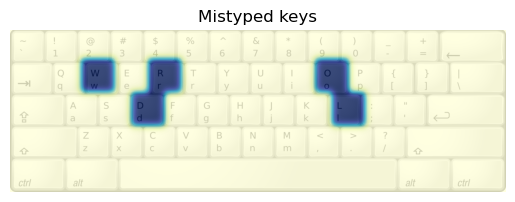

In [8]:
HMQ = Heatmap('qwerty')
chars = mistyped
unique,count = np.unique([char for char in chars],return_counts=True)
char_dict = dict(zip(unique,count))

HMQ.make_heatmap(char_dict,layout='qwerty',cmap='YlGnBu',sigmas=0.1)
plt.title('Mistyped keys');

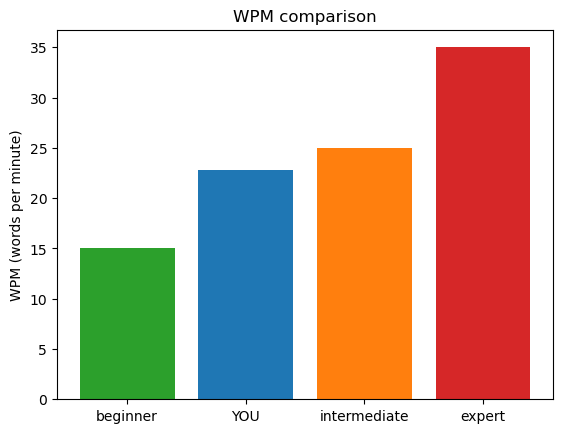

In [9]:
your_wpm = float(statistics.loc[statistics['type'] == 'wpm']['value'].values[0])

fig, ax = plt.subplots()

counts = [15, 25, your_wpm, 35]
indices = np.argsort(counts)

levels = ['beginner', 'intermediate', 'YOU', 'expert']
bar_colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:red']

ax.bar([levels[i] for i in indices], [counts[i] for i in indices], label=[levels[i] for i in indices], color=[bar_colors[i] for i in indices])

ax.set_ylabel('WPM (words per minute)')
ax.set_title('WPM comparison')
#ax.legend(title='Typing level')

plt.show()

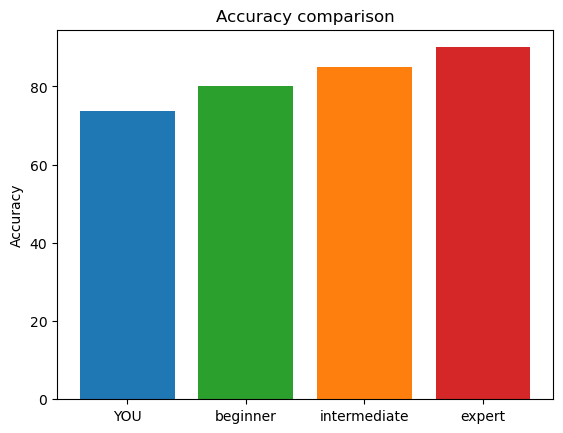

In [10]:
your_accuracy = float(statistics.loc[statistics['type'] == 'accuracy']['value'].values[0])

fig, ax = plt.subplots()

counts = [80, 85, your_accuracy, 90]
indices = np.argsort(counts)

levels = ['beginner', 'intermediate', 'YOU', 'expert']
bar_colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:red']

ax.bar([levels[i] for i in indices], [counts[i] for i in indices], label=[levels[i] for i in indices], color=[bar_colors[i] for i in indices])

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparison')
#ax.legend(title='Accuracy level')

plt.show()

## Left-hand vs. Right-hand comparison

In [31]:
saving = pd.read_csv('saving.csv')

In [33]:
saving['Time_Difference'] = saving['Time_Difference'].abs()

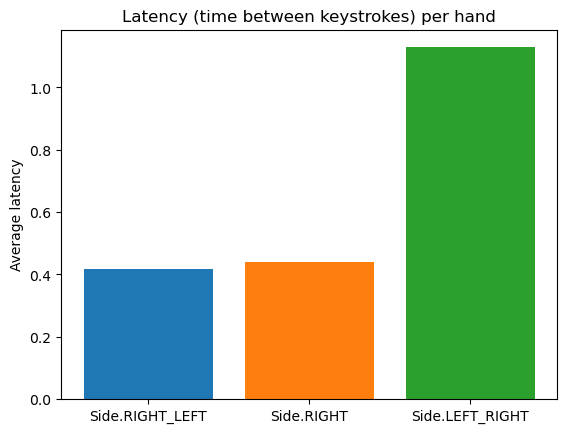

In [50]:
grouped = saving.groupby('side_to_side')['Time_Difference'].mean()

fig, ax = plt.subplots()

counts = list(grouped.values)
indices = np.argsort(counts)

levels = list(grouped.index)
bar_colors = ['tab:green', 'tab:orange', 'tab:blue', 'tab:red']

ax.bar([levels[i] for i in indices], [counts[i] for i in indices], label=[levels[i] for i in indices], color=[bar_colors[i] for i in indices])

ax.set_ylabel('Average latency')
ax.set_title('Latency (time between keystrokes) per hand')
#ax.legend(title='Accuracy level')

plt.show()

In [ ]:
pass